In [606]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3 as sql

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [607]:
database = "/projects/py-restaurant-data-analysis/db.sqlite3"
connection = sql.connect(database)
cursor = connection.cursor()
restaurant_data = pd.read_sql(
    "SELECT restaurant_orderitem.id, restaurant_product.name AS ProductName, restaurant_product.price AS Price, restaurant_orderitem.quantity AS Quantity, restaurant_order.datetime AS OrderDatetime "
    "FROM restaurant_orderitem "
    "INNER JOIN restaurant_order "
    "ON restaurant_order.id = restaurant_orderitem.order_id "
    "INNER JOIN restaurant_product "
    "ON restaurant_product.id = restaurant_orderitem.product_id;",
    connection
)
restaurant_data.to_csv(
    "/projects/py-restaurant-data-analysis/restaurant_data.csv",
    index=False,
)
connection.close()
restaurant_csv_file = "/projects/py-restaurant-data-analysis/restaurant_data.csv"
restaurant_info = pd.read_csv(restaurant_csv_file, index_col=[0])
restaurant_info["OrderDatetime"] = pd.to_datetime(restaurant_info["OrderDatetime"])
restaurant_info = restaurant_info.reset_index()

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

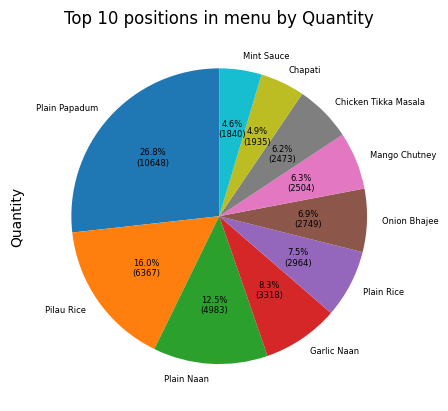

In [608]:
from typing import Any, Callable

all_products = restaurant_info.groupby("ProductName")
total_count_of_products = all_products.sum()
popular_products = total_count_of_products.nlargest(10, ["Quantity"])
popular_products = popular_products.reset_index()
product_data = popular_products["Quantity"]
product_labels = popular_products.ProductName


def format_converter(values: Any) -> Callable:
    def output_format(percentage: Any) -> str:
        total = sum(values)
        value = int(round(percentage * total / 100.0))
        return f"{percentage:.1f}%\n({value:d})"

    return output_format


plt.pie(
    product_data,
    labels=product_labels,
    autopct=format_converter(product_data),
    textprops={"fontsize": 6},
    radius=1,
    startangle=90,
)
plt.title("Top 10 positions in menu by Quantity")
plt.ylabel("Quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

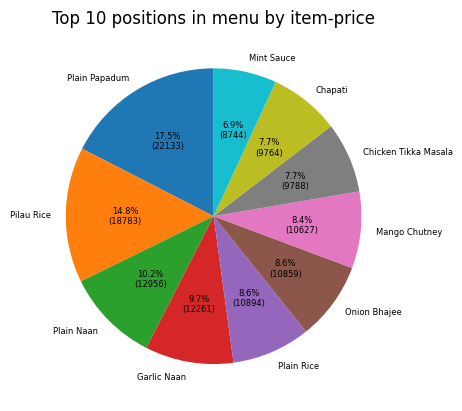

In [609]:
restaurant_info["ItemPrice"] = restaurant_info["Price"] * restaurant_info["Quantity"]
all_products = restaurant_info.groupby("ProductName")
total_count_of_products = all_products.sum()
expensive_products = total_count_of_products.nlargest(10, ["ItemPrice"])
product_data = expensive_products["ItemPrice"]

plt.pie(
    product_data,
    labels=product_labels,
    autopct=format_converter(product_data),
    textprops={"fontsize": 6},
    radius=1,
    startangle=90,
)
plt.title("Top 10 positions in menu by item-price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

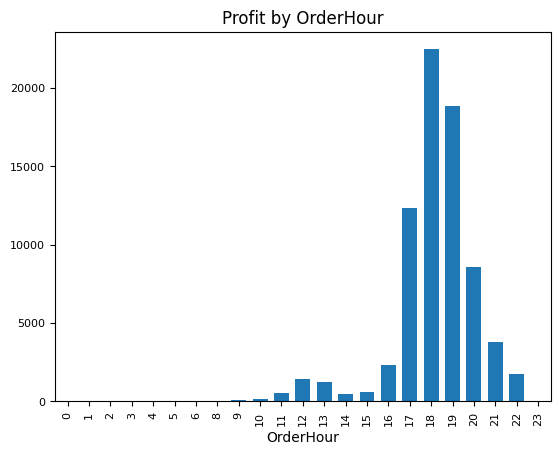

In [610]:
restaurant_info["OrderHour"] = restaurant_info["OrderDatetime"].dt.hour
hourly_price = restaurant_info.groupby("OrderHour")["ItemPrice"].count()
hourly_price.plot(
    kind="bar",
    stacked=True,
    width=0.7,
    fontsize=8,
    title="Profit by OrderHour",
)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

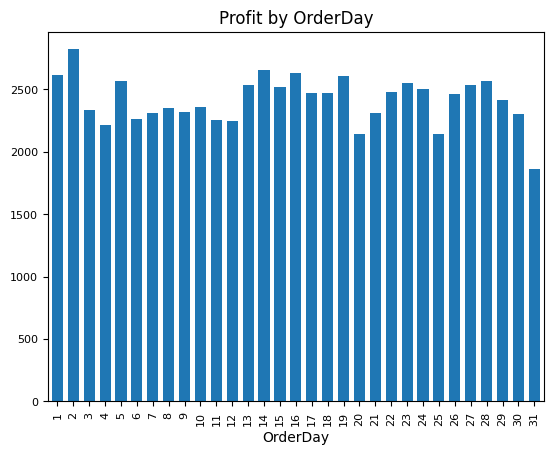

In [611]:
restaurant_info["OrderDay"] = restaurant_info["OrderDatetime"].dt.day
hourly_price = restaurant_info.groupby("OrderDay")["ItemPrice"].count()
hourly_price.plot(
    kind="bar",
    stacked=True,
    width=0.7,
    fontsize=8,
    title="Profit by OrderDay",
)
plt.show()